In [1]:
import numpy as np
import scipy as sp
import library3 as lb
import math
import matplotlib.pyplot as plt
import copy

# Ques 1: part a

In [2]:
# The matrix A
A = np.array([
    [   4,    2/3, -4/3,  4/3],
    [  2/3,    4,    0,    0 ],
    [ -4/3,    0,    6,    2 ],
    [  4/3,    0,    2,    6 ]
    ])

In [3]:
# the initial guess
x0 = np.array([1, 1, 1, 1])

eigval, eigvec,steps = lb.power_method_find(A, x0)

print("The results are as follows:")

print("Maximum Eigenvalue: ", np.round(eigval, 4))
print(f"Eigenvector corresponding to eigen value {round(eigval)}: ", np.round(eigvec, 4))
print("Number of steps: ", steps,"(to reach the tolerance of 1e-6)")

The results are as follows:
Maximum Eigenvalue:  8.0
Eigenvector corresponding to eigen value 8:  [5.000e-04 2.000e-04 7.068e-01 7.074e-01]
Number of steps:  25 (to reach the tolerance of 1e-6)


# Ques 1: Part b

In [4]:
e,steps = lb.eigen_QR(A)
print("Eigenvalues using QR method: ", e)
print("Number of steps: ", steps,"(to reach the tolerance of 1e-6)")

Eigenvalues using QR method:  [6. 4. 8. 2.]
Number of steps:  21 (to reach the tolerance of 1e-6)


# Ques 2: part a

Coefficients [0.5746586674196053, 4.725861442141991, -11.128217777643158, 7.668677622909172]


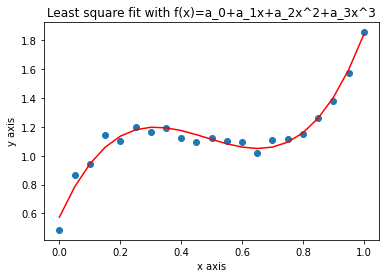

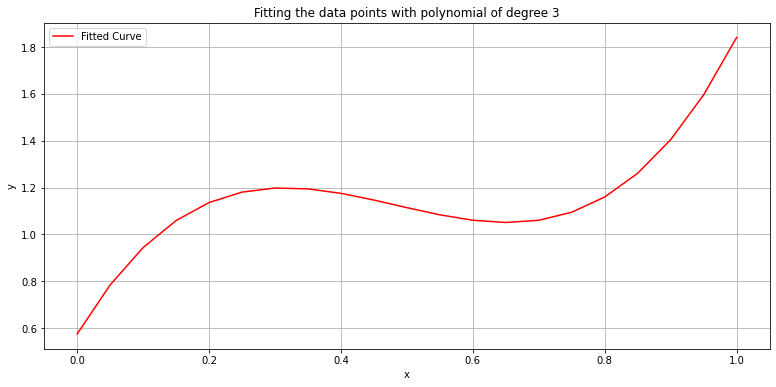

In [5]:
#least square fit for polynomials
weights_cubic = 0

f=open('fit3.txt','r')

l=[[float(num) for num in line.split(' ')] for line in f]

weights_cubic,x_plot,y_plot = lb.LeastSquareFit(l)
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.plot(x_plot, y_plot, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the data points with polynomial of degree 3')
plt.grid()
plt.legend()
plt.show()

l = np.array(l)

X_cubic = np.column_stack([np.ones(len(l[:,0])), l[:,0], np.power(l[:,0], 2), np.power(l[:,0], 3)])

cond_num_cubic = np.linalg.norm(np.linalg.inv(X_cubic.T.dot(X_cubic)), np.inf) * np.linalg.norm(X_cubic, np.inf)

# Ques 2 b

In [12]:
a, A_cheby = lb.fit_chebyshev(l,3)

Coeffecients: [1.1609694790335525, 0.39351446798815237, 0.04684983209010658, 0.23964617571596986]
The red curve is the fitted curve


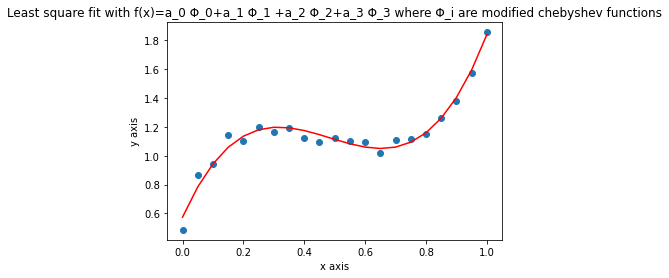

In [13]:
print("Coeffecients:",a)

x,y=[],[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
plt.scatter(x,y)

x, y = [], []
for i in range(len(l)):
    sum=0
    for j in range(len(a)):
        #sum=sum+(a[j])*((l[i][0])**j)
        sum += (a[j])*(lb.chebyshev(l[i][0],j))
    y.append(sum)
    x.append(l[i][0])
        
plt.plot(x, y, label='Fitted Curve', color='red')
print("The red curve is the fitted curve")
plt.title("Least square fit with f(x)=a_0 Φ_0+a_1 Φ_1 +a_2 Φ_2+a_3 Φ_3 where Φ_i are modified chebyshev functions")
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.show()

In [14]:
X_cheby = np.column_stack([lb.chebyshev(l[:,0], i) for i in range(4)])

cond_num_cheby = np.linalg.norm(np.linalg.inv(X_cheby.T.dot(X_cheby)), np.inf) * np.linalg.norm(X_cheby, np.inf)

print("Condition number for cubic square fit:", cond_num_cubic)
print("Condition number for fit using chebyshev polynomials:", cond_num_cheby)


Condition number for cubic square fit: 1989.7834177007235
Condition number for fit using chebyshev polynomials: 0.7215007215007221


A lower condition number implies superior numerical stability, indicating that minor variations in input data, such as measurement errors, will yield only slight adjustments in the fitted parameters. Conversely, a higher condition number signifies poorer numerical stability, where even minor changes in input data can result in significant alterations in the fitted parameters, potentially leading to overfitting or underfitting.

Hence, employing Chebyshev polynomials as a basis for the fit yields substantially superior results compared to using a cubic polynomial.